In [133]:
# Import required packages
import h5py # reading given files
import numpy as np # converting data to array 
import matplotlib.pyplot as plt # displaying missclassified labels
from sklearn.linear_model import LogisticRegression # classification model: logistic regression
from sklearn.metrics import accuracy_score # report accuracy of regression model 

In [135]:
# This function is to load data
def load_data(train_path, test_path):
    with h5py.File(train_path, 'r') as train_file: # Load data from the train data file
        train_set_x_orig = np.array(train_file['train_set_x'][:])  # Train images
        train_set_y = np.array(train_file['train_set_y'][:])  # Train labels
        classes = np.array(train_file['list_classes'][:])  # Class labels

    with h5py.File(test_path, 'r') as test_file: # Load data from the test data file
        test_set_x_orig = np.array(test_file['test_set_x'][:])  # Test images
        test_set_y = np.array(test_file['test_set_y'][:])  # Test labels

    return train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes # It returns train x, train y, test x, test y, and class labels

In [137]:
# This function is to preprocess data(flatten, normalization) for regression
def preprocess_data(train_set_x_orig, test_set_x_orig, train_set_y, test_set_y):
    # Flatten and normalize the images
    train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1) 
    test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1) 
    
    # Reshape labels
    train_set_y = train_set_y.reshape(-1, 1).ravel()
    test_set_y = test_set_y.reshape(-1, 1).ravel()
    
    return train_set_x_flatten, test_set_x_flatten, train_set_y, test_set_y

In [139]:
# I used logistic regression for classification model. 
# I constructed regression model by applying in-built function in sklearn.linear_model
def train_logistic_regression(train_x, train_y):
    model = LogisticRegression(max_iter=2000)
    model.fit(train_x,train_y)
    return model

In [141]:
# This function is to evaluate regression model. It reports accuracy and indices of missclassified predictions. 
# For convenience for displaying missclassified images, it returns the indices of misclassified predictions. 
def model_evaluation(model, test_x, test_y):
    predictions = model.predict(test_x) # Predict the model using test data
    accuracy = accuracy_score(test_y, predictions) # Report accuracy score
    print(f"Accuracy of the model: {accuracy}")
    misclassified_indices = np.where(predictions !=  test_y)[0] # Find indices where the prediction and the actual label does not match
    print(f"\nMissclassified Indices: {misclassified_indices}") # Report indices of missclassified predictions
    return misclassified_indices

In [143]:
# This function is to display images misclassified predictions
def display_misclassified_images(test_x_orig, test_y, predictions, misclassified_indices, classes):
    plt.figure(figsize=(10, 10)) # Set figure size
    n = len(misclassified_indices)
    for i, idx in enumerate(misclassified_indices[:n]):  # Show up to 10 misclassified images
        image = test_x_orig[idx]  # Retrieve the original image
        if image.ndim == 1:  # If image is flattened, reshape it
            image = image.reshape(64, 64, 3)  # Adjust dimensions as needed for your dataset
        
        plt.subplot(int(n/2), 2, i + 1) # Plots of 5 rows and 2 columns
        plt.imshow(image.astype('uint8'))  # Ensure correct data type for display
        true_label = classes[test_y[idx]]
        pred_label = classes[predictions[idx]]
        plt.title(f"True: {true_label}, Pred: {pred_label}") # Title of each plot displays true label and predicted label
        plt.axis('off') # Hide x and y axis for each plot 

    plt.tight_layout()
    plt.show()

Accuracy of the model: 0.72

Missclassified Indices: [ 6 10 11 13 18 19 24 28 29 30 41 44 45 46]
14


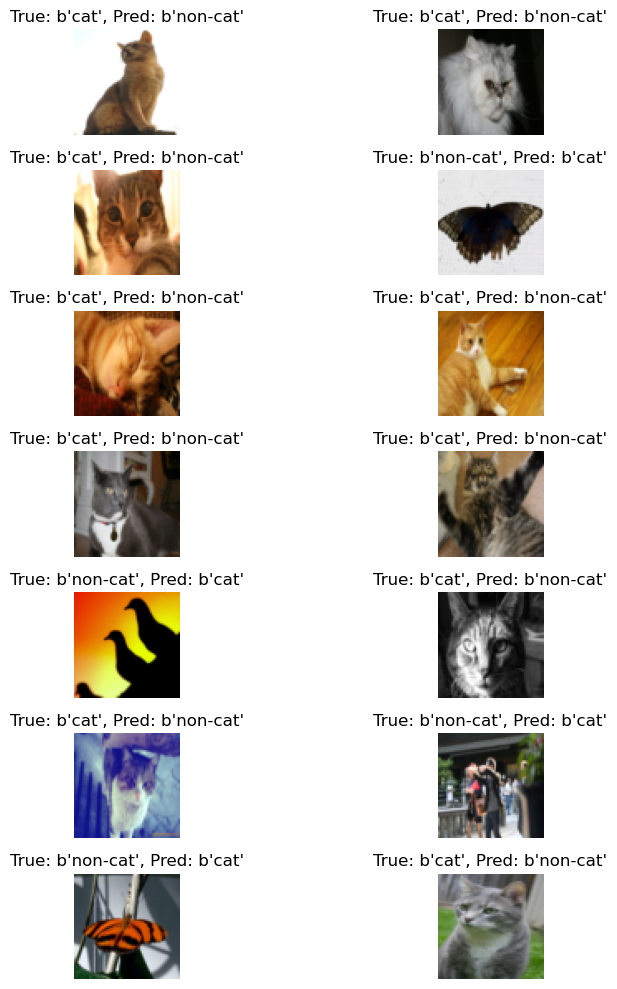

In [147]:
train_path = '/Users/chaeeunshin/Desktop/AMS595/train_catvnoncat.h5'
test_path = '/Users/chaeeunshin/Desktop/AMS595/test_catvnoncat.h5'
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_data(train_path, test_path)
train_x, test_x, train_y, test_y = preprocess_data(train_set_x_orig, test_set_x_orig, train_set_y, test_set_y)
model = train_logistic_regression(train_x, train_y)
missclassified_indices = model_evaluation(model, test_x, test_y)
print(len(missclassified_indices))
display_misclassified_images(test_set_x_orig, test_y, model.predict(test_x), misclassified_indices, classes)